In [1]:
# my first ever script to manipulate gene expression data!

In [1]:
# allows me to find my working directory
# getwd()
# I can use setwd() to set working directory

In [3]:
#load libraries
library(dplyr)
library(tidyverse)
library(GEOquery)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

In [4]:
#read the data
dat<-read.csv(file = "~/Documents/Bioinformatics for Organoids/Bioinfomagician/101/GSE183947_fpkm.csv")

head(dat)

,X,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,⋯,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,0.93,1.97,0.00,5.45,4.52,4.75,3.96,3.58,6.41,⋯,6.66,8.35,8.94,6.33,5.94,6.35,3.74,4.84,10.46,4.54
2,TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.39,⋯,0.12,0.17,1.08,0.29,0.00,0.07,9.19,1.18,0.09,0.39
3,DPM1,0.00,0.43,0.00,3.43,8.45,8.53,7.80,7.62,6.40,⋯,4.93,7.47,5.72,4.96,9.28,9.15,4.77,3.75,7.31,2.77
4,SCYL3,5.78,5.17,8.76,4.58,7.20,6.03,9.05,5.37,5.92,⋯,8.02,6.00,5.28,4.98,4.45,7.00,4.14,5.51,7.45,2.33
5,C1orf112,2.83,6.26,3.37,6.24,5.16,13.69,6.69,5.28,7.65,⋯,7.91,4.61,8.35,9.84,7.68,5.62,2.81,7.08,7.28,5.39
6,FGR,4.80,1.83,0.00,4.23,15.87,8.56,13.28,12.27,5.58,⋯,6.99,6.16,13.27,19.33,2.89,40.13,10.53,9.00,4.45,11.42


In [5]:
#dimension of the dataframe (rows.columns)
dim(dat)

[1] 20246    61

In [6]:
#metadata
#for info about the GEOquery Package: https://www.bioconductor.org/packages/devel/bioc/vignettes/GEOquery/inst/doc/GEOquery.html
gse <- getGEO(GEO = 'GSE183947', GSEMatrix = TRUE)


Found 1 file(s)

GSE183947_series_matrix.txt.gz



In [7]:
show(gse)

$GSE183947_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 0 features, 60 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM5574685 GSM5574686 ... GSM5574744 (60 total)
  varLabels: title geo_accession ... tissue:ch1 (41 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 35046993 
Annotation: GPL11154 



In [8]:
metadata <- pData(phenoData(gse[[1]]))
head(metadata)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,instrument_model,library_selection,library_source,library_strategy,relation,relation.1,supplementary_file_1,donor:ch1,metastasis:ch1,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,GSM5574685,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395376,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143676,NONE,102548,yes,breast tumor
GSM5574686,tumor rep2,GSM5574686,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395377,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143617,NONE,104338,yes,breast tumor
GSM5574687,tumor rep3,GSM5574687,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395378,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143618,NONE,105094,yes,breast tumor
GSM5574688,tumor rep4,GSM5574688,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395379,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143619,NONE,109745,no,breast tumor
GSM5574689,tumor rep5,GSM5574689,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21394912,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143620,NONE,1906415,no,breast tumor
GSM5574690,tumor rep6,GSM5574690,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21394913,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143621,NONE,1912627,yes,breast tumor


In [9]:
#column names of metadata to see which coloumns I want
colnames(metadata)

[1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "characteristics_ch1.1"   "characteristics_ch1.2"  
[13] "molecule_ch1"            "extract_protocol_ch1"   
[15] "extract_protocol_ch1.1"  "taxid_ch1"              
[17] "description"             "data_processing"        
[19] "data_processing.1"       "data_processing.2"      
[21] "data_processing.3"       "data_processing.4"      
[23] "platform_id"             "contact_name"           
[25] "contact_institute"       "contact_address"        
[27] "contact_city"            "contact_state"          
[29] "contact_zip/postal_code" "contact_country"        
[31] "data_row_count"          "instrument_model"       
[33] "library_selection"       "library_source"         
[35] "library_strategy"        "relation"               
[37] "relation.1"              "supplementary_file_1"   
[39] "donor:ch1"               "metastasis:ch1"         
[41] "tissue:ch1"

In [10]:
#select only few columns from the metadata (title, tumor or tissue, metastatsis

metadata.subset <- select(metadata, c(1, 10, 11, 17))
head(metadata.subset)

,title,characteristics_ch1,characteristics_ch1.1,description
,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,tissue: breast tumor,metastasis: yes,CA.102548
GSM5574686,tumor rep2,tissue: breast tumor,metastasis: yes,CA.104338
GSM5574687,tumor rep3,tissue: breast tumor,metastasis: yes,CA.105094
GSM5574688,tumor rep4,tissue: breast tumor,metastasis: no,CA.109745
GSM5574689,tumor rep5,tissue: breast tumor,metastasis: no,CA.1906415
GSM5574690,tumor rep6,tissue: breast tumor,metastasis: yes,CA.1912627


In [11]:
#using the pipe operator for the first time

metadata %>%
    select(1,10,11,17) %>%
    head()
    

,title,characteristics_ch1,characteristics_ch1.1,description
,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,tissue: breast tumor,metastasis: yes,CA.102548
GSM5574686,tumor rep2,tissue: breast tumor,metastasis: yes,CA.104338
GSM5574687,tumor rep3,tissue: breast tumor,metastasis: yes,CA.105094
GSM5574688,tumor rep4,tissue: breast tumor,metastasis: no,CA.109745
GSM5574689,tumor rep5,tissue: breast tumor,metastasis: no,CA.1906415
GSM5574690,tumor rep6,tissue: breast tumor,metastasis: yes,CA.1912627


In [12]:
#rename columns

metadata %>%
    select(1,10,11,17) %>%
    rename(tissue = characteristics_ch1) %>%
    rename(metastasis = characteristics_ch1.1) %>%
    head()

,title,tissue,metastasis,description
,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,tissue: breast tumor,metastasis: yes,CA.102548
GSM5574686,tumor rep2,tissue: breast tumor,metastasis: yes,CA.104338
GSM5574687,tumor rep3,tissue: breast tumor,metastasis: yes,CA.105094
GSM5574688,tumor rep4,tissue: breast tumor,metastasis: no,CA.109745
GSM5574689,tumor rep5,tissue: breast tumor,metastasis: no,CA.1906415
GSM5574690,tumor rep6,tissue: breast tumor,metastasis: yes,CA.1912627


In [13]:
#remove strings from data in the columns

metadata.modified <- metadata %>%
    select(1,10,11,17) %>%
    rename(tissue = characteristics_ch1) %>%
    rename(metastasis = characteristics_ch1.1) %>%
    mutate(tissue = gsub("tissue: ", "", tissue)) %>%
    mutate(metastasis = gsub("metastasis: ", "", metastasis))
head(metadata.modified )


,title,tissue,metastasis,description
,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,breast tumor,yes,CA.102548
GSM5574686,tumor rep2,breast tumor,yes,CA.104338
GSM5574687,tumor rep3,breast tumor,yes,CA.105094
GSM5574688,tumor rep4,breast tumor,no,CA.109745
GSM5574689,tumor rep5,breast tumor,no,CA.1906415
GSM5574690,tumor rep6,breast tumor,yes,CA.1912627


In [14]:
#reshaping data to long format from wide format for metadata addition

#wide format
head(dat)

,X,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,⋯,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,0.93,1.97,0.00,5.45,4.52,4.75,3.96,3.58,6.41,⋯,6.66,8.35,8.94,6.33,5.94,6.35,3.74,4.84,10.46,4.54
2,TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.39,⋯,0.12,0.17,1.08,0.29,0.00,0.07,9.19,1.18,0.09,0.39
3,DPM1,0.00,0.43,0.00,3.43,8.45,8.53,7.80,7.62,6.40,⋯,4.93,7.47,5.72,4.96,9.28,9.15,4.77,3.75,7.31,2.77
4,SCYL3,5.78,5.17,8.76,4.58,7.20,6.03,9.05,5.37,5.92,⋯,8.02,6.00,5.28,4.98,4.45,7.00,4.14,5.51,7.45,2.33
5,C1orf112,2.83,6.26,3.37,6.24,5.16,13.69,6.69,5.28,7.65,⋯,7.91,4.61,8.35,9.84,7.68,5.62,2.81,7.08,7.28,5.39
6,FGR,4.80,1.83,0.00,4.23,15.87,8.56,13.28,12.27,5.58,⋯,6.99,6.16,13.27,19.33,2.89,40.13,10.53,9.00,4.45,11.42


In [15]:
#reshaping to long format
dat.long <- dat %>%
    rename(gene = X) %>%
    gather(key = 'samples', value = 'FPKM', -gene)

head(dat.long)

,gene,samples,FPKM
,<chr>,<chr>,<dbl>
1,TSPAN6,CA.102548,0.93
2,TNMD,CA.102548,0.00
3,DPM1,CA.102548,0.00
4,SCYL3,CA.102548,5.78
5,C1orf112,CA.102548,2.83
6,FGR,CA.102548,4.80


In [16]:
# join dataframes = dat.long + metadata.modified matching the samples om dat.long with the description in metadata.modified
# more information about joining dataframes: https://statisticsglobe.com/r-dplyr-join-inner-left-right-full-semi-anti


dat.long <- dat.long %>%
    left_join(., metadata.modified, by = c("samples" = "description"))

head(dat.long)


,gene,samples,FPKM,title,tissue,metastasis
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,TSPAN6,CA.102548,0.93,tumor rep1,breast tumor,yes
2,TNMD,CA.102548,0.00,tumor rep1,breast tumor,yes
3,DPM1,CA.102548,0.00,tumor rep1,breast tumor,yes
4,SCYL3,CA.102548,5.78,tumor rep1,breast tumor,yes
5,C1orf112,CA.102548,2.83,tumor rep1,breast tumor,yes
6,FGR,CA.102548,4.80,tumor rep1,breast tumor,yes


In [17]:
# explore data - compare expression between tumour and normal samples

dat.long %>%
    filter(gene == 'BRCA1' | gene == 'BRCA2') %>%
    head()
    

,gene,samples,FPKM,title,tissue,metastasis
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,BRCA1,CA.102548,30.37,tumor rep1,breast tumor,yes
2,BRCA2,CA.102548,0.38,tumor rep1,breast tumor,yes
3,BRCA1,CA.104338,24.43,tumor rep2,breast tumor,yes
4,BRCA2,CA.104338,0.23,tumor rep2,breast tumor,yes
5,BRCA1,CA.105094,43.58,tumor rep3,breast tumor,yes
6,BRCA2,CA.105094,0.00,tumor rep3,breast tumor,yes


In [18]:
# group by and summarize (mean and median) and arrange

dat.long %>%
    filter(gene == 'BRCA1' | gene == 'BRCA2') %>%
    group_by(gene, tissue)%>%
    summarize(mean_FPKM = mean(FPKM),
             median_FPKM = median(FPKM))%>%
    arrange(-mean_FPKM)


#BRCA1 is overexpressed in breast cancer
#BRCA2 is underexpressed in breast cancer

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.


gene,tissue,mean_FPKM,median_FPKM
<chr>,<chr>,<dbl>,<dbl>
BRCA1,breast tumor,10.042333,6.965
BRCA1,normal breast tissue,7.698667,6.450
BRCA2,normal breast tissue,3.047333,1.250
BRCA2,breast tumor,2.044000,1.600


Visualization of RNA-Seq data using ggplot:
1. Bar plots
2. Density plots
3. Box plots
4. Scatter plots
5. Heatmap

In [19]:
#load library

library(ggplot2)

In [20]:
# basic formula for ggplot
# ggplot(data, aes(x = variable, y = variable1))+
#     geom_col()

In [21]:
# working with the long form of the data frame
# extracting only BRCA1

dat.long %>%
    filter (gene == 'BRCA1')%>%
    head()

,gene,samples,FPKM,title,tissue,metastasis
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,BRCA1,CA.102548,30.37,tumor rep1,breast tumor,yes
2,BRCA1,CA.104338,24.43,tumor rep2,breast tumor,yes
3,BRCA1,CA.105094,43.58,tumor rep3,breast tumor,yes
4,BRCA1,CA.109745,11.05,tumor rep4,breast tumor,no
5,BRCA1,CA.1906415,3.38,tumor rep5,breast tumor,no
6,BRCA1,CA.1912627,5.96,tumor rep6,breast tumor,yes


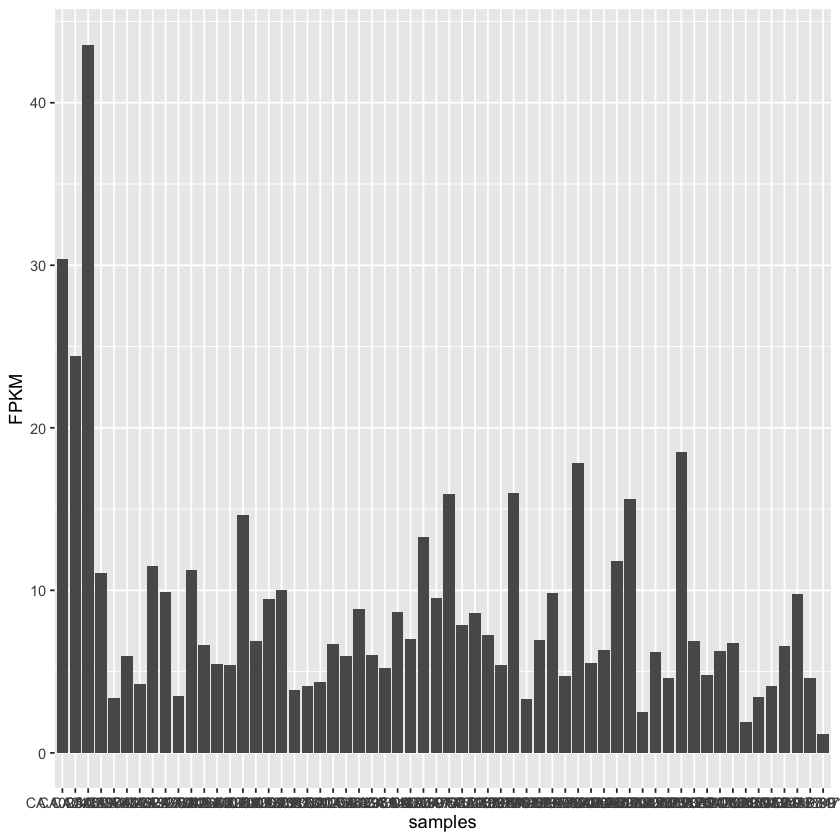

In [22]:
# basic column plot

dat.long %>%
    filter (gene == 'BRCA1')%>%
    ggplot(., aes(x = samples, y = FPKM)) +
    geom_col()
    

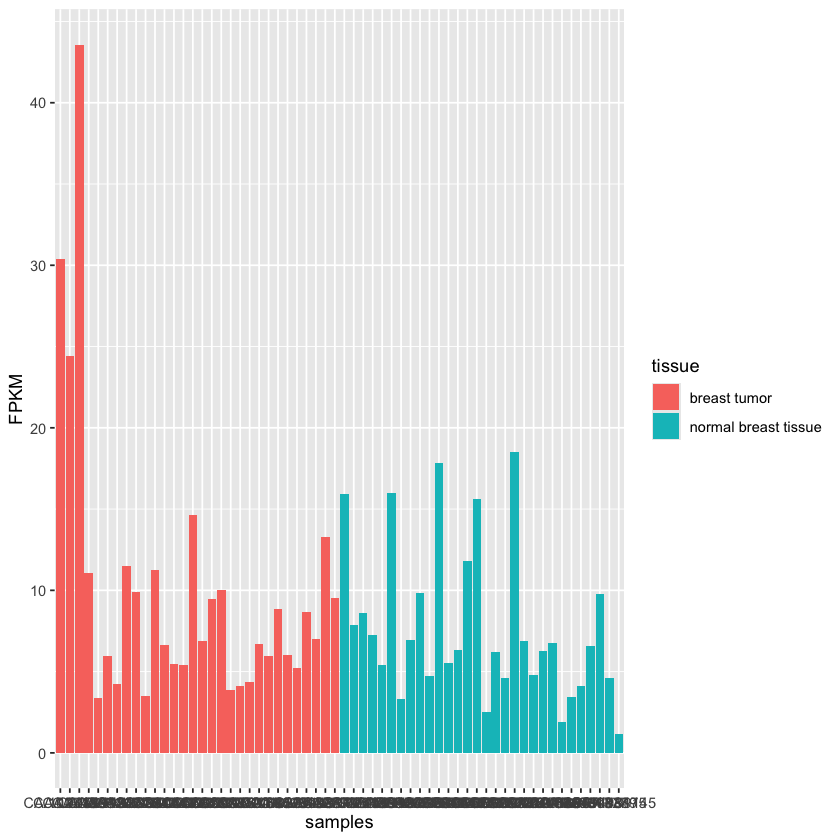

In [33]:
# to color the columns based on tissue type

dat.long %>%
    filter (gene == 'BRCA1')%>%
    ggplot(., aes(x = samples, y = FPKM, fill = tissue)) +
    geom_col()

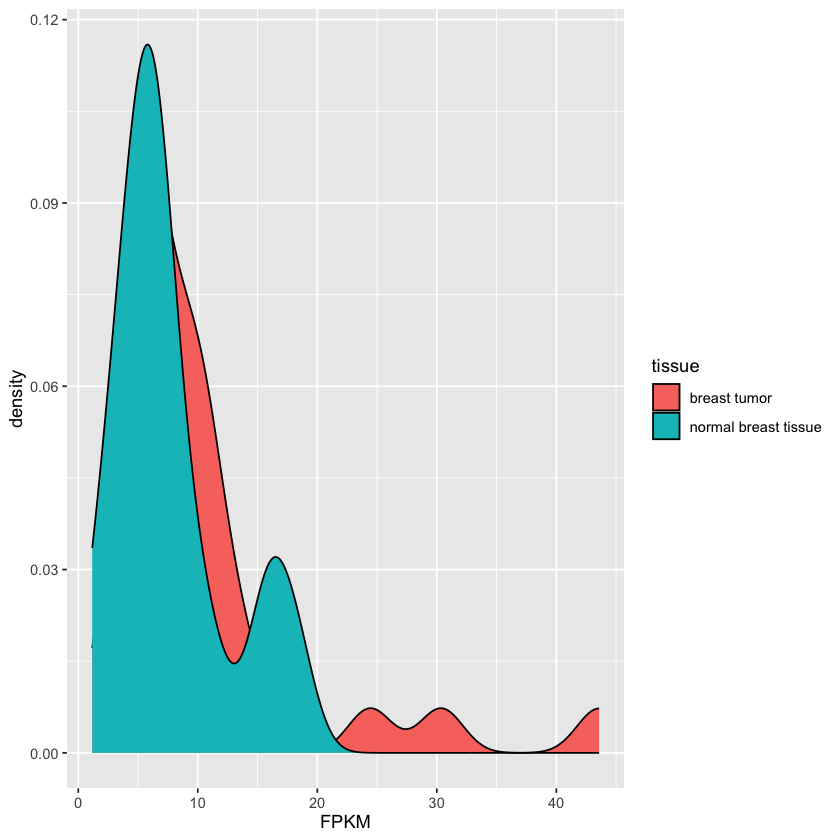

In [24]:
# simple density plot

dat.long %>%
    filter (gene == 'BRCA1')%>%
    ggplot(., aes(x = FPKM, fill = tissue)) +
    geom_density()

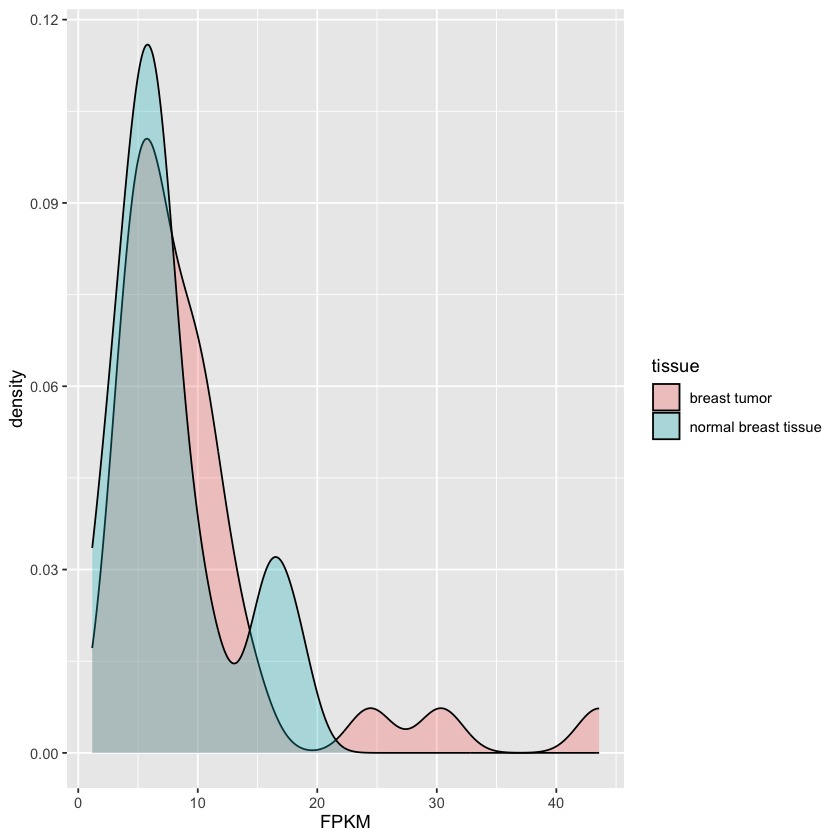

In [25]:
# changing opacity of density plots

dat.long %>%
    filter (gene == 'BRCA1')%>%
    ggplot(., aes(x = FPKM, fill = tissue)) +
    geom_density(alpha = 0.3)

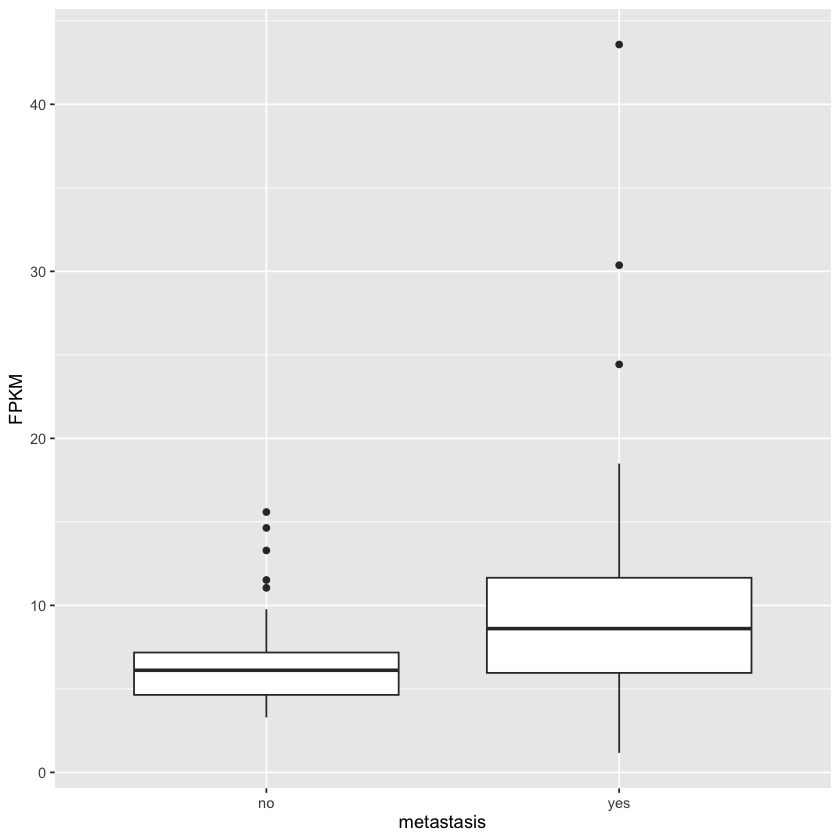

In [26]:
# simple boxplot to compare samples having different metastasis status

dat.long %>%
    filter (gene == 'BRCA1')%>%
    ggplot(.,aes(x = metastasis, y = FPKM)) +
    geom_boxplot()

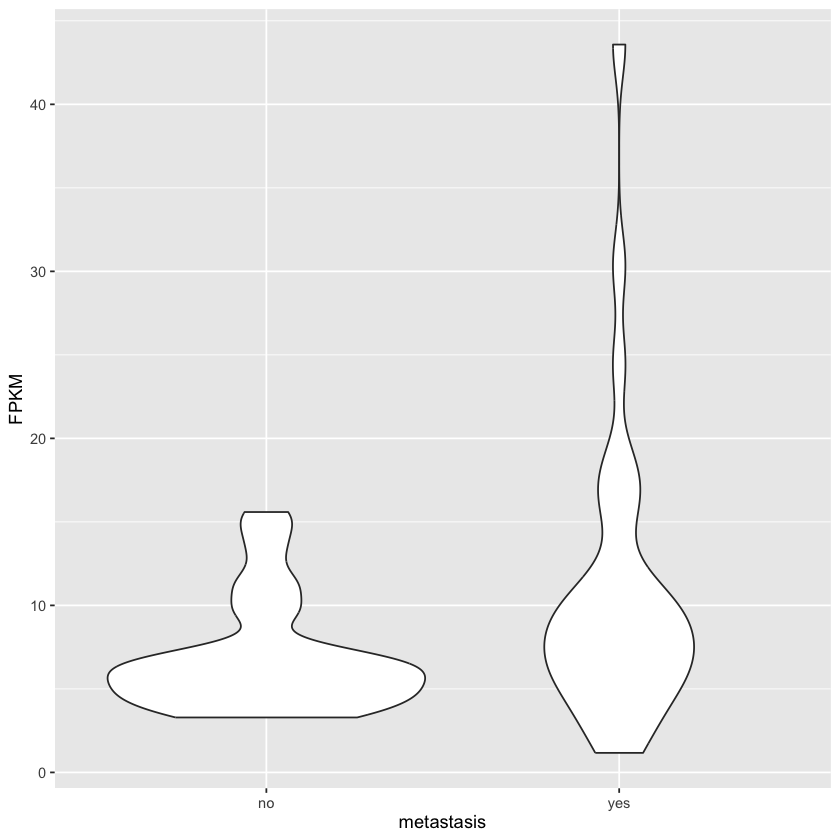

In [27]:
# simple violin plot to compare samples having different metastasis status

dat.long %>%
    filter (gene == 'BRCA1')%>%
    ggplot(.,aes(x = metastasis, y = FPKM)) +
    geom_violin()

In [28]:
# compare expression between BRCA1 and BRCA2 with a scatterplot

dat.long %>%
    filter (gene == 'BRCA1' | gene == 'BRCA2') %>%
    head()
    

,gene,samples,FPKM,title,tissue,metastasis
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,BRCA1,CA.102548,30.37,tumor rep1,breast tumor,yes
2,BRCA2,CA.102548,0.38,tumor rep1,breast tumor,yes
3,BRCA1,CA.104338,24.43,tumor rep2,breast tumor,yes
4,BRCA2,CA.104338,0.23,tumor rep2,breast tumor,yes
5,BRCA1,CA.105094,43.58,tumor rep3,breast tumor,yes
6,BRCA2,CA.105094,0.00,tumor rep3,breast tumor,yes


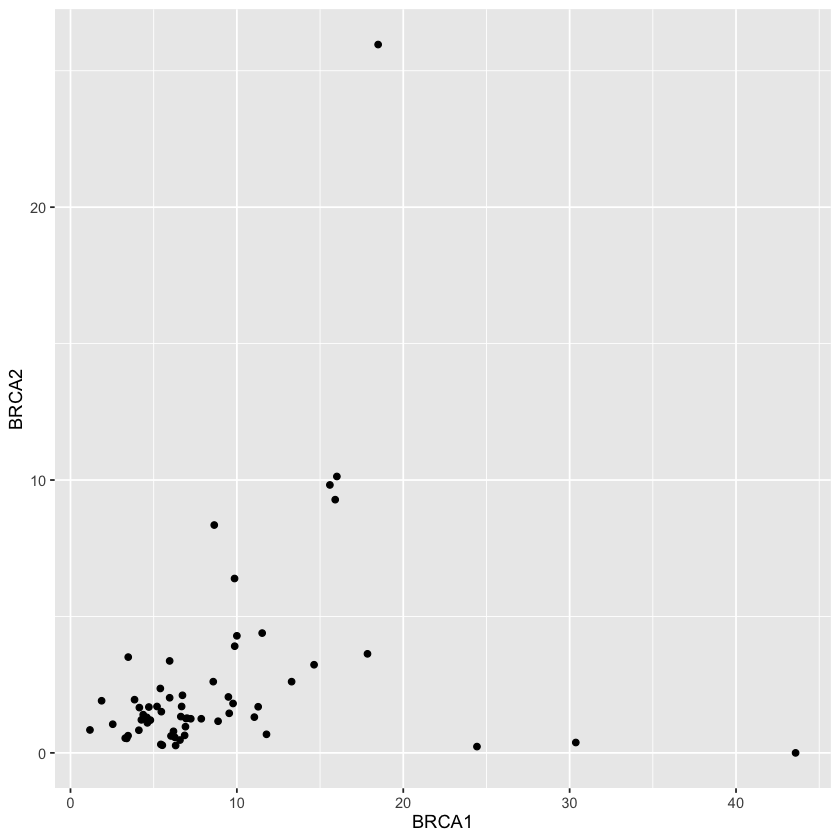

In [29]:
# but first the scatterplot requires the data to be in the spread format again

dat.long %>%
    filter (gene == 'BRCA1' | gene == 'BRCA2') %>%
    spread(key = gene, value = FPKM) %>%
    ggplot(., aes(x = BRCA1, y = BRCA2)) +
    geom_point()
        
    

`geom_smooth()` using formula = 'y ~ x'


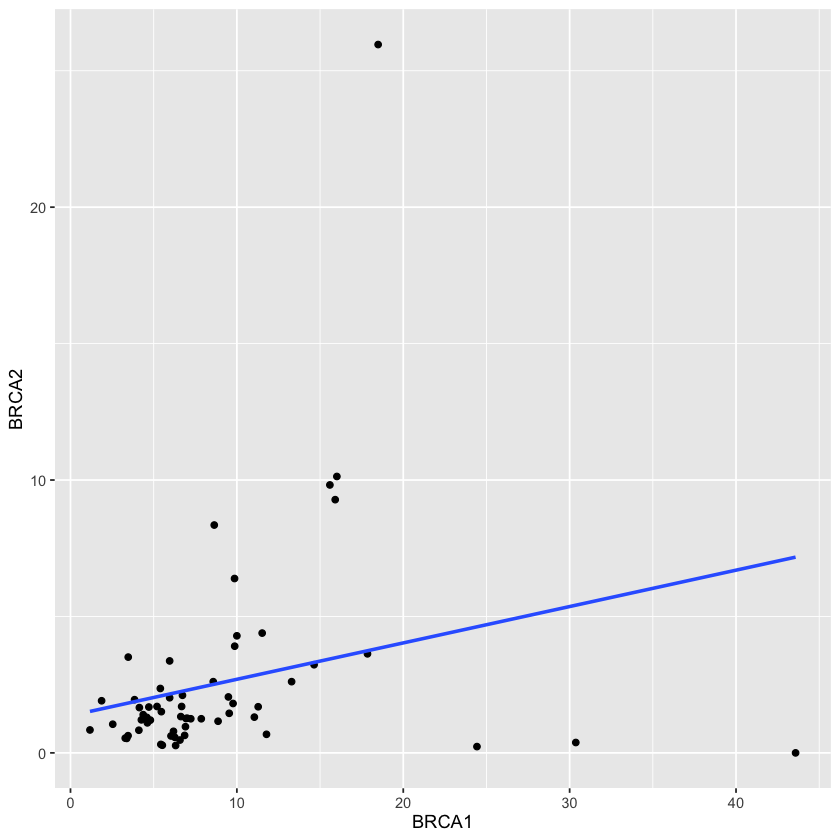

In [34]:
# correlation - fit a straight line

dat.long %>%
    filter (gene == 'BRCA1' | gene == 'BRCA2') %>%
    spread(key = gene, value = FPKM) %>%
    ggplot(., aes(x = BRCA1, y = BRCA2)) +
    geom_point()+
    geom_smooth(method = 'lm', se = FALSE) #se is for confidence intervals, lm is for straight line

        


`geom_smooth()` using formula = 'y ~ x'


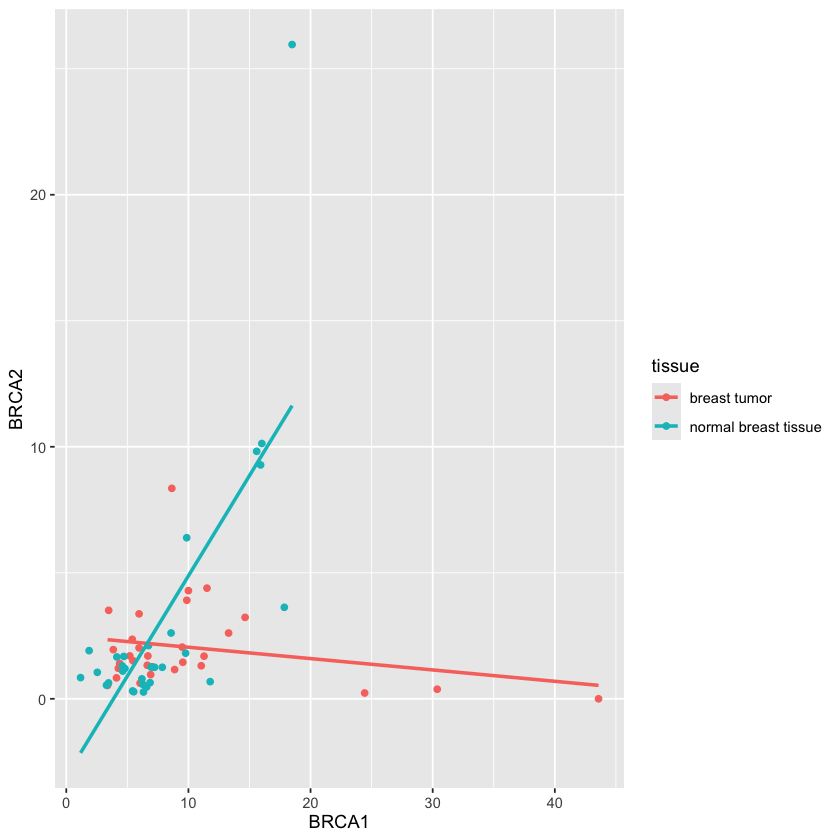

In [39]:
# adding color based on the tissue

dat.long %>%
    filter (gene == 'BRCA1' | gene == 'BRCA2') %>%
    spread(key = gene, value = FPKM) %>%
    ggplot(., aes(x = BRCA1, y = BRCA2, color = tissue)) + #what is the difference between fill and color?
    geom_point()+
    geom_smooth(method = 'lm', se = FALSE) #se is for confidence intervals, lm is for straight line

        


In [47]:
# heatmap

genes.of.interest <- c('BRCA1', 'BRCA2', 'TP53', 'ALK', 'MYCN') # this is a charecter vector
dat.long %>%
    filter (gene %in% genes.of.interest) %>%
    head()
    

,gene,samples,FPKM,title,tissue,metastasis
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,BRCA1,CA.102548,30.37,tumor rep1,breast tumor,yes
2,MYCN,CA.102548,0.38,tumor rep1,breast tumor,yes
3,BRCA2,CA.102548,0.38,tumor rep1,breast tumor,yes
4,TP53,CA.102548,38.27,tumor rep1,breast tumor,yes
5,ALK,CA.102548,0.22,tumor rep1,breast tumor,yes
6,BRCA1,CA.104338,24.43,tumor rep2,breast tumor,yes


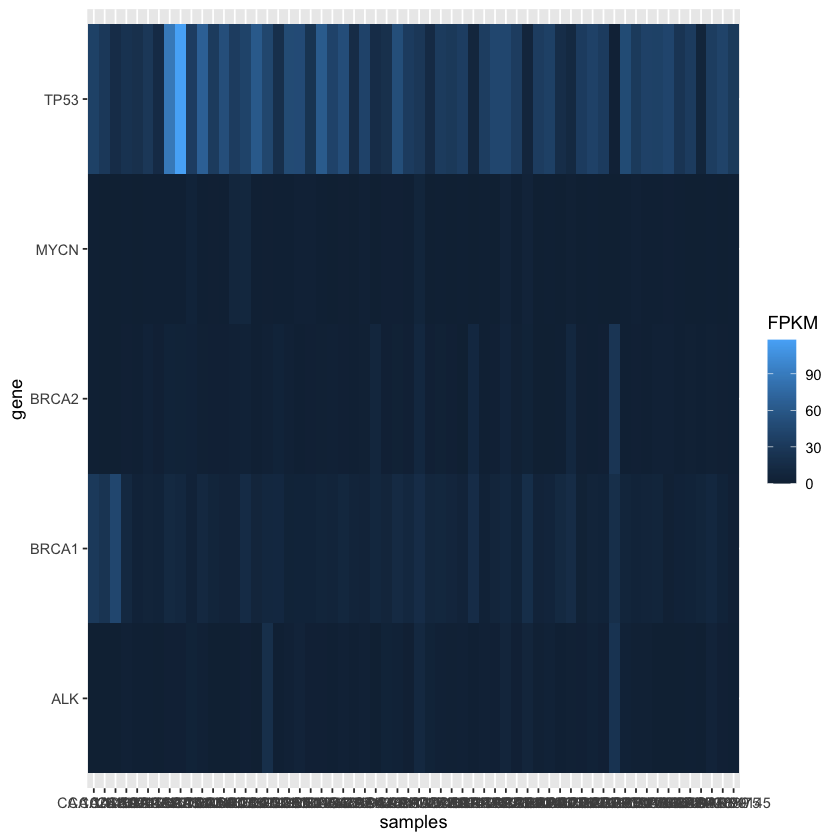

In [48]:
genes.of.interest <- c('BRCA1', 'BRCA2', 'TP53', 'ALK', 'MYCN') # this is a charecter vector
dat.long %>%
    filter (gene %in% genes.of.interest) %>%
    ggplot(., aes(x = samples, y = gene, fill = FPKM)) +
    geom_tile()
    

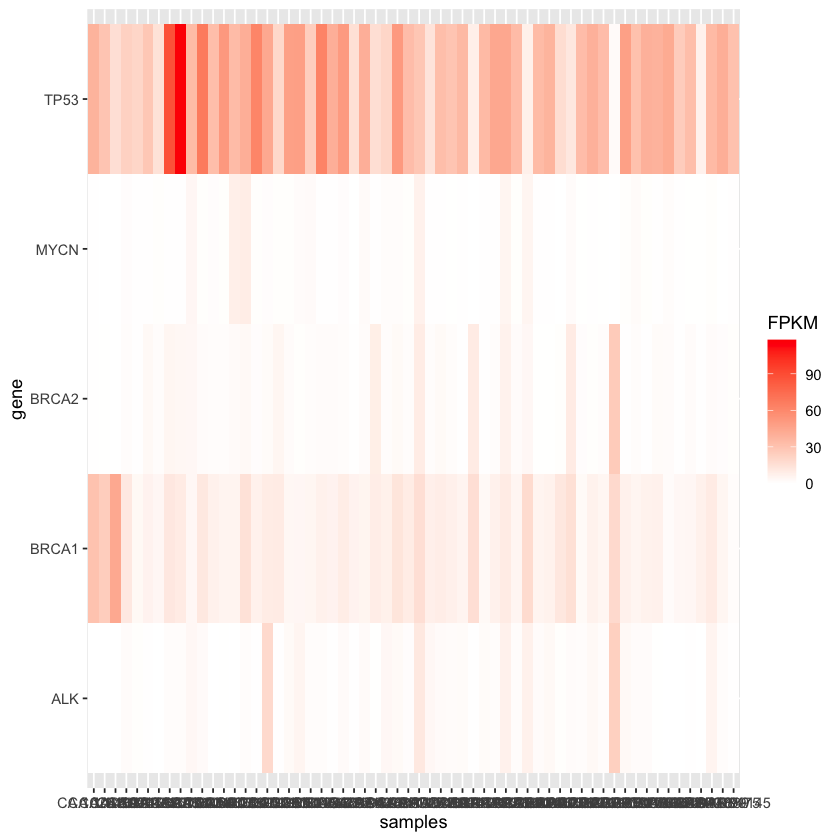

In [50]:
# change the color to have more contrast

genes.of.interest <- c('BRCA1', 'BRCA2', 'TP53', 'ALK', 'MYCN') # this is a charecter vector
p <- dat.long %>%
    filter (gene %in% genes.of.interest) %>%
    ggplot(., aes(x = samples, y = gene, fill = FPKM)) +
    geom_tile() +
    scale_fill_gradient(low = 'white', high = 'red')
p

In [51]:
# saving plots

#vairable method (pdf or png), width and height are in inches by default
ggsave(p, filename = 'heatmap_save1.pdf', width = 10, height = 8)



In [52]:
# inline/no variable method

pdf("heatmap_save2.pdf", width = 10, height = 8)
dat.long %>%
    filter (gene %in% genes.of.interest) %>%
    ggplot(., aes(x = samples, y = gene, fill = FPKM)) +
    geom_tile() +
    scale_fill_gradient(low = 'white', high = 'red')
dev.off()

agg_record_755755560 
                   2